In [3]:
import requests

import geopandas as gpd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [4]:
# the Chicago Data Portal returns 1000 records at a time
# The data must be queried with the offset parameter 
business_df = pd.DataFrame()

for offset in range(0, 60000, 1000):
    active_business_url = f"https://data.cityofchicago.org/resource/uupf-x98q.json?$limit=1000&$offset={offset}"
    response = requests.get(active_business_url)
    offset_df = pd.DataFrame(response.json())
    business_df = pd.concat([business_df,offset_df])

In [5]:
business_df.head()

,license_description,zip_code,license_id,location,date_issued,city,ward_precinct,address,license_status,conditional_approval,...,license_number,license_approved_for_issuance,expiration_date,account_number,site_number,license_code,legal_name,id,ssa,application_created_date
0,Regulated Business License,60655,2962346,"{'latitude': '41.70083904551383', 'human_addre...",2024-04-15T00:00:00.000,CHICAGO,19-29,10555 S KEDZIE AVE,AAI,N,...,2862408,2024-04-12T00:00:00.000,2026-08-15T00:00:00.000,487722,1,4404,T'MARIE ART COMPANY LLC,2862408-20240816,NaN,NaN
1,Shared Kitchen User (Long Term),60605,2962074,"{'latitude': '41.864950550027714', 'human_addr...",2024-04-04T00:00:00.000,CHICAGO,3-26,1327 S PLYMOUTH CT 1 C,AAI,N,...,2856289,NaN,2026-07-15T00:00:00.000,486252,2,8344,HOOK POINT FISHERIES LLC,2856289-20240716,NaN,NaN
2,Valet Parking Operator,60611,2963136,"{'latitude': '41.892140783720365', 'human_addr...",2024-05-03T00:00:00.000,CHICAGO,42-48,540 N MICHIGAN AVE,AAI,N,...,2463664,2024-05-03T00:00:00.000,2025-06-30T00:00:00.000,63376,189,2101,INTERPARK LLC,2463664-20240701,NaN,NaN
3,Retail Food Establishment,60616,2962847,"{'latitude': '41.85372213502968', 'human_addre...",2024-04-29T00:00:00.000,CHICAGO,11-16,2147 S CHINA PL 1 & 2,AAI,N,...,2202688,2024-04-27T00:00:00.000,2026-06-15T00:00:00.000,20942,2,1006,NEW LEE WING WAH INC,2202688-20240616,NaN,NaN
4,Regulated Business License,60614,2965955,"{'latitude': '41.920459758521204', 'human_addr...",2024-04-16T00:00:00.000,CHICAGO,2-20,2105 N SOUTHPORT AVE 2 SUITE 200,AAI,N,...,2851545,2024-04-15T00:00:00.000,2026-06-15T00:00:00.000,486731,1,4404,HEAT 3.0 LLC,2851545-20240616,NaN,NaN


In [6]:
business_df.columns

Index(['license_description', 'zip_code', 'license_id', 'location',
       'date_issued', 'city', 'ward_precinct', 'address', 'license_status',
       'conditional_approval', 'state', 'payment_date', 'business_activity',
       'license_start_date', 'latitude', 'precinct',
       'application_requirements_complete', 'ward', 'doing_business_as_name',
       'police_district', 'business_activity_id', 'longitude',
       'application_type', 'license_number', 'license_approved_for_issuance',
       'expiration_date', 'account_number', 'site_number', 'license_code',
       'legal_name', 'id', 'ssa', 'application_created_date'],
      dtype='object')

# How Many Jewel's are in Chicago


In [7]:

jewels = business_df[business_df["legal_name"] == "JEWEL FOOD STORES, INC."]

In [8]:
jewels.head()

,license_description,zip_code,license_id,location,date_issued,city,ward_precinct,address,license_status,conditional_approval,...,license_number,license_approved_for_issuance,expiration_date,account_number,site_number,license_code,legal_name,id,ssa,application_created_date
778,Food - Shared Kitchen - Supplemental,60656,2951734,"{'latitude': '41.97454294770947', 'human_addre...",2024-04-24T00:00:00.000,CHICAGO,41-36,7342 W FOSTER AVE 1ST,AAI,N,...,2951734,2024-04-23T00:00:00.000,2026-03-15T00:00:00.000,259,26,8343,"JEWEL FOOD STORES, INC.",2951734-20240424,NaN,2024-01-24T00:00:00.000
927,Retail Food Establishment,60641,2948915,"{'latitude': '41.95355443840363', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,45-7,4660 W IRVING PARK RD 1ST,AAI,N,...,1409,2024-01-17T00:00:00.000,2026-03-15T00:00:00.000,259,34,1006,"JEWEL FOOD STORES, INC.",1409-20240316,28,NaN
937,Food - Shared Kitchen - Supplemental,60617,2948917,"{'latitude': '41.722263198133774', 'human_addr...",2024-01-18T00:00:00.000,CHICAGO,7-38,1655 E 95TH ST 1ST,AAI,N,...,2698892,2024-01-17T00:00:00.000,2026-03-15T00:00:00.000,259,36,8343,"JEWEL FOOD STORES, INC.",2698892-20240316,NaN,NaN
941,Retail Food Establishment,60654,2948926,"{'latitude': '41.89242136613116', 'human_addre...",2024-01-18T00:00:00.000,CHICAGO,42-20,550 N STATE ST,AAI,N,...,1226337,2024-01-17T00:00:00.000,2026-03-15T00:00:00.000,259,51,1006,"JEWEL FOOD STORES, INC.",1226337-20240316,NaN,NaN
943,Retail Food Establishment,60622,2948911,"{'latitude': '41.906243703084954', 'human_addr...",2024-01-18T00:00:00.000,CHICAGO,1-21,1341 N PAULINA ST 1,AAI,N,...,1398,2024-01-17T00:00:00.000,2026-03-15T00:00:00.000,259,29,1006,"JEWEL FOOD STORES, INC.",1398-20240316,33,NaN


In [9]:
no_of_jewels = jewels["doing_business_as_name"].nunique()
print(f"Thee are {no_of_jewels} Jewels currently active in Chicago")

Thee are 24 Jewels currently active in Chicago


# Whole Foods

In [10]:
wholefoods = business_df[business_df["doing_business_as_name"] == "WHOLE FOODS MARKET"]

In [11]:
print(f"There are {wholefoods["address"].nunique()} currently registered in Chicago")

There are 12 currently registered in Chicago


# Mariano's

In [12]:
marianos = wholefoods = business_df[business_df["legal_name"] == "ROUNDY'S ILLINOIS, LLC"]

In [13]:
print(f"There are {marianos["doing_business_as_name"].nunique()} Mariano's in Chicago")

There are 13 Mariano's in Chicago


# Trader Joe's

In [14]:
trader_joes = business_df[business_df["legal_name"] == "TRADER JOE'S EAST INC."]

In [15]:
print(f"There are {trader_joes["address"].nunique()} Trader Joe's in Chicago")

There are 6 Trader Joe's in Chicago


# Aldi

In [16]:
aldi =  business_df[business_df["legal_name"] == "ALDI INC."]

In [17]:
print(f"There are {aldi["address"].nunique()} Aldi's in Chicago")

There are 31 Aldi's in Chicago


# Mapping

In [19]:
shape_file = "../../shape_files/geo_export_13b5a44a-41a4-464a-8d09-00ab1c022c4d.shp"
chicago_map = gpd.read_file(shape_file)

<Axes: >

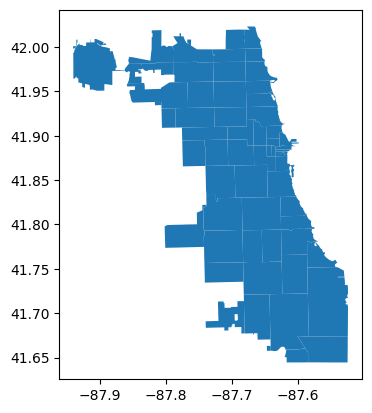

In [20]:
chicago_map.plot()